In [273]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
import os

#Normalizzatore di dati
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#Comparatore di parametri
from sklearn.model_selection import GridSearchCV, cross_val_score

#Generatore di Random Forest
from sklearn.ensemble import RandomForestClassifier

#Valutatore di Precisione
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score


%matplotlib inline
rcParams['figure.figsize'] = 10,8
sns.set(style='whitegrid', palette='muted',
        rc={'figure.figsize': (12,8)})

#Gestione rete neurale
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from sklearn.linear_model import LogisticRegression

from keras.layers import Dense, Activation, Dropout


#Autoapprendimento
from numpy.random import seed
import tensorflow as tf

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
# print(os.listdir("../input"))

# Parte 1: pulizia dei dati

In [274]:
#Caricamento dei dati in dataframe Pandas
train = pd.read_csv('/train.csv', )
test = pd.read_csv('/test.csv')

#Unione dei database
df = pd.concat([train, test], axis=0, sort=True)

In [275]:
#Prima visione del database unificato
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [276]:
# Mostriamo tutti i dati del data frame
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

display_all(df.describe(include='all').T)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,1046.0,NaN,NaN,NaN,29.881138,14.413493,0.17,21.0,28.0,39.0,80.0
Cabin,295,186,C23 C25 C27,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Embarked,1307,3,S,914,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,1308.0,NaN,NaN,NaN,33.295479,51.758668,0.0,7.8958,14.4542,31.275,512.3292
Name,1309,1307,"Connolly, Miss. Kate",2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Parch,1309.0,NaN,NaN,NaN,0.385027,0.86556,0.0,0.0,0.0,0.0,9.0
PassengerId,1309.0,NaN,NaN,NaN,655.0,378.020061,1.0,328.0,655.0,982.0,1309.0
Pclass,1309.0,NaN,NaN,NaN,2.294882,0.837836,1.0,2.0,3.0,3.0,3.0
Sex,1309,2,male,843,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SibSp,1309.0,NaN,NaN,NaN,0.498854,1.041658,0.0,0.0,0.0,1.0,8.0


In [277]:
#Conteggio sopravvissuti
df['Survived'].value_counts()

0.0    549
1.0    342
Name: Survived, dtype: int64

# Cerchiamo i titoli (es. Mr., Miss.) per trovare l'età media di ogni gruppo di titoli

In [278]:
#Creazione colonna di titoli estraendo dal nome l'informazione
df['Title'] = df['Name'].str.extract('([A-Za-z]+)\.', expand=True)

In [279]:
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr


In [280]:
#Conteggio titoli
df['Title'].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Lady          1
Sir           1
Mme           1
Don           1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: Title, dtype: int64

In [281]:
#Sostituzione titoli rari con titoli comuni
mapping = {'Mlle': 'Miss', 'Major': 'Mr', 'Col': 'Mr', 'Sir': 'Mr',
           'Don': 'Mr', 'Mme': 'Mrs', 'Jonkheer': 'Mr', 'Lady': 'Mrs',
           'Capt': 'Mr', 'Countess': 'Mrs', 'Ms': 'Miss', 'Dona': 'Mrs'}
df.replace({'Title': mapping}, inplace=True)

In [282]:
#controllo titoli rimanenti
df['Title'].value_counts()

Mr        767
Miss      264
Mrs       201
Master     61
Rev         8
Dr          8
Name: Title, dtype: int64

In [283]:
# Calcolo dell'età media per titolo
title_ages = dict(df.groupby('Title')['Age'].median())

# Creazione di una colonna di età media per passeggero
df['age_med'] = df['Title'].apply(lambda x: title_ages[x])

# Sostituzione valori null dell'età dei passeggeri con età media dele titolo
df['Age'].fillna(df['age_med'], inplace=True, )
#Cancellazione colonna di supporto età media
del df['age_med']

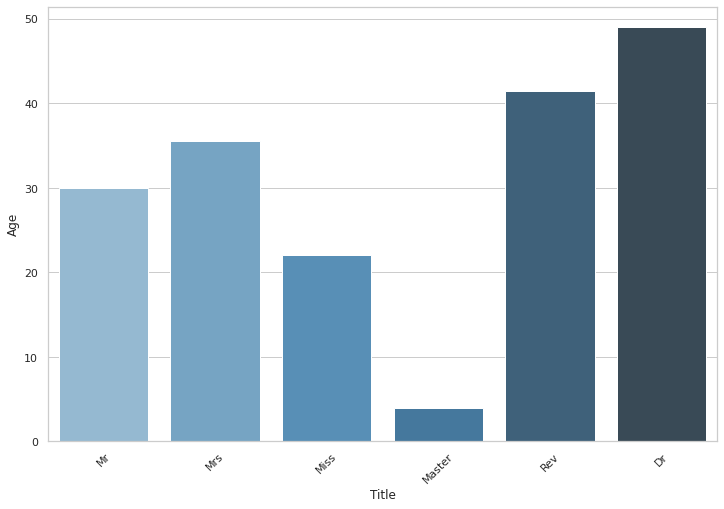

In [284]:
#Grafico età media per titolo
sns.barplot(x='Title', y='Age', data=df, estimator=np.median, ci=None, palette='Blues_d')
plt.xticks(rotation=45)
plt.show()

## Mostriamo i sopravvissuti per titolo

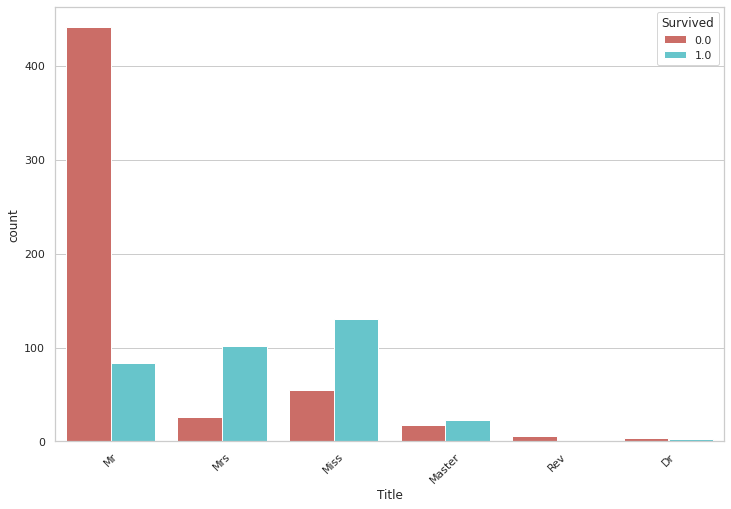

In [285]:
#Grafico sopravvissuti per titolo
sns.countplot(x='Title', data=df, palette='hls', hue='Survived')
plt.xticks(rotation=45)
plt.show()

## Mostriamo il grafico di sopravvivenza, basato su sesso e costo del biglietto

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 47.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 13.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


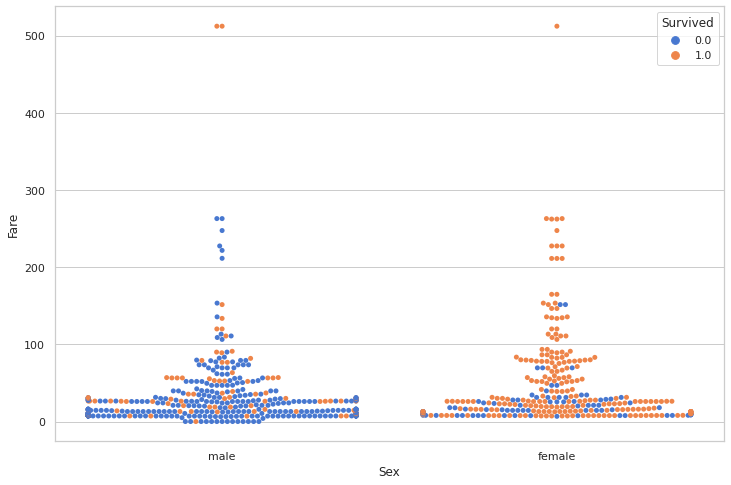

In [286]:
#Grafico sopravvissuti per costo biglietto e sesso 
sns.swarmplot(x='Sex', y='Fare', hue='Survived', data=df, size = 5)
plt.show()

In [287]:
#Normalizziamo i costi dei biglietti assenti
# Creazione di una media del costo del biglietto basata sulla classe di soggiorno
class_fares = dict(df.groupby('Pclass')['Fare'].median())

# Creazione di una colonna di costo del biglietto basata 
# sulla media data la classe di soggiorno di un passeggero
df['fare_med'] = df['Pclass'].apply(lambda x: class_fares[x])

# Sostituzione di valori null del costo del biglietto con la sua media per classe
df['Fare'].fillna(df['fare_med'], inplace=True, )

#Cancellazione colonna di media costo biglietto per classe
del df['fare_med']

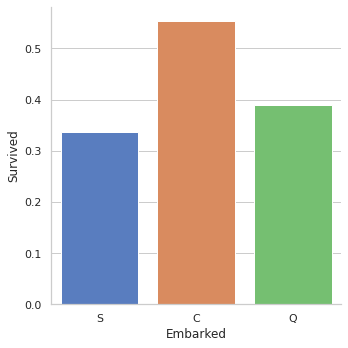

In [288]:
#Grafico porto di imbarco
sns.catplot(x='Embarked', y='Survived', data=df,
            kind='bar', palette='muted', ci=None)
plt.show()

In [289]:
#Aggiungo porti di imbarco dove non presente basandomi su quello del passeggero successivo
df['Embarked'].fillna(method='backfill', inplace=True)

## Creiamo la colonna contenente il numero di membri per famiglia

In [290]:
# Creazione colonna di numero familiari usando il numero di 
# figli/genitori + sorelle/coniugi forniti
df['Family_Size'] = df['Parch'] + df['SibSp']

In [291]:
#Mostro i dati completi
display_all(df.describe(include='all').T)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,1309.0,NaN,NaN,NaN,29.562391,13.16536,0.17,22.0,30.0,35.5,80.0
Cabin,295,186,C23 C25 C27,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Embarked,1309,3,S,915,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,1309.0,NaN,NaN,NaN,33.276193,51.743584,0.0,7.8958,14.4542,31.275,512.3292
Name,1309,1307,"Connolly, Miss. Kate",2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Parch,1309.0,NaN,NaN,NaN,0.385027,0.86556,0.0,0.0,0.0,0.0,9.0
PassengerId,1309.0,NaN,NaN,NaN,655.0,378.020061,1.0,328.0,655.0,982.0,1309.0
Pclass,1309.0,NaN,NaN,NaN,2.294882,0.837836,1.0,2.0,3.0,3.0,3.0
Sex,1309,2,male,843,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SibSp,1309.0,NaN,NaN,NaN,0.498854,1.041658,0.0,0.0,0.0,1.0,8.0


In [292]:
#Divisione dei database train e test basandosi sul parametro survived dei passeggeri
# *Test non aveva la colonna survived
train = df[pd.notnull(df['Survived'])]
test = df[pd.isnull(df['Survived'])]

In [293]:
#Salvataggio dei database normalizzati
train.to_csv('train_clean.csv', index=False)
test.to_csv('test_clean.csv', index=False)

In [294]:
#Creazione nuovi dataframe pandas con i db normalizzati
train = pd.read_csv('/kaggle/working/train_clean.csv', )
test = pd.read_csv('/kaggle/working/test_clean.csv')

#Unione e riordinamento di train e test normalizzati
df = pd.concat([train, test], axis=0, sort=True)

# Parte 2: convertiamo in valore numerico alcuni campi che hanno pochi valori univoci

In [295]:
#Mostro i dati
df.head()

,Age,Cabin,Embarked,Family_Size,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title
0,22.0,NaN,S,1,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr
1,38.0,C85,C,1,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs
2,26.0,NaN,S,0,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss
3,35.0,C123,S,1,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs
4,35.0,NaN,S,0,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr


## Mostriamo sopravvissuti per classe



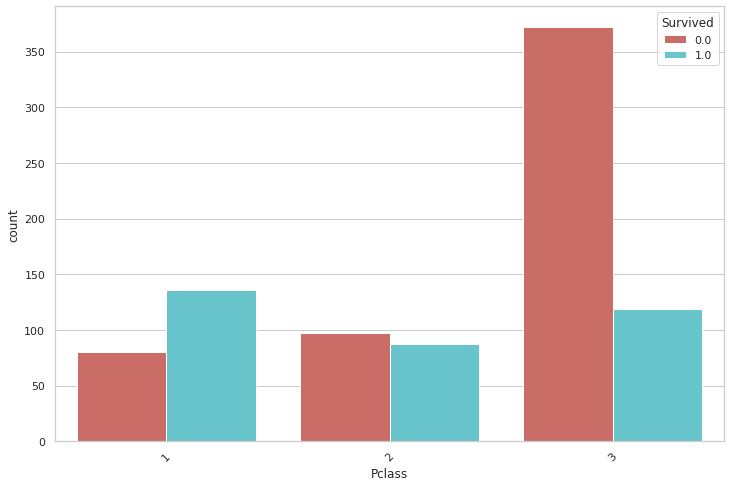

In [296]:
#Grafico di morti per classe
sns.countplot(x='Pclass', data=df, palette='hls', hue='Survived')
plt.xticks(rotation=45)
plt.show()

## Mostriamo sopravvissuti per sesso

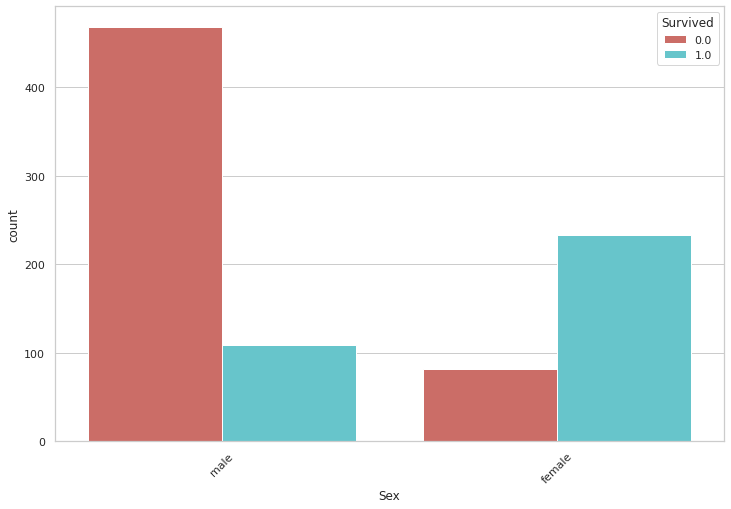

In [297]:
#Grafico morti per sesso
sns.countplot(x='Sex', data=df, palette='hls', hue='Survived')
plt.xticks(rotation=45)
plt.show()

## Mostriamo sopravvisuti per luogo d'imbarco

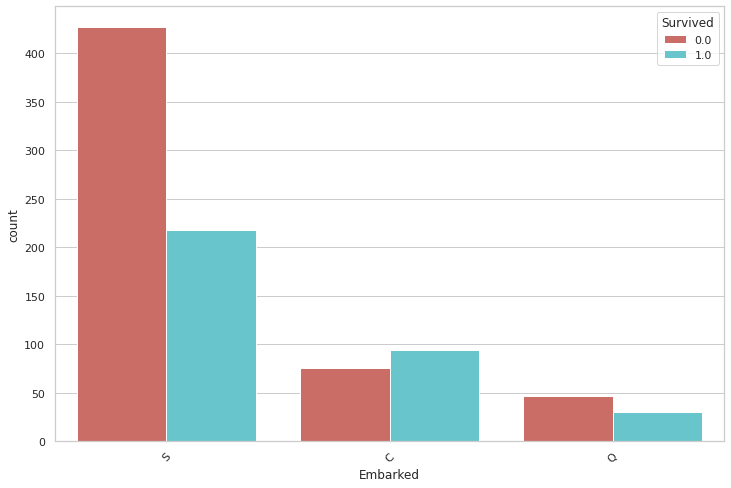

In [298]:
#Grafico sopravvissuti per porto di imbarco
sns.countplot(x='Embarked', data=df, palette='hls', hue='Survived')
plt.xticks(rotation=45)
plt.show()

In [299]:
# Conversione a tipo category pandas il sesso (Ibrido stringa/integer)
df['Sex'] = df['Sex'].astype('category')
# Conversione in 1 o 0 il sesso
df['Sex'] = df['Sex'].cat.codes

In [300]:
#Divisione in 1 o 0 titolo e porto di imbarco
categorical = ['Embarked', 'Title','Ticket']

for var in categorical:
    df = pd.concat([df, 
                    pd.get_dummies(df[var], prefix=var)], axis=1)
    del df[var]

In [301]:
#Cancellazione dati non necessari o non valutabili (Numero cabina, nome , numero biglietto, id)
df.drop(['Cabin', 'Name', 'PassengerId'], axis=1, inplace=True)

In [302]:
df.head()

,Age,Family_Size,Fare,Parch,Pclass,Sex,SibSp,Survived,Embarked_C,Embarked_Q,...,Ticket_W./C. 14258,Ticket_W./C. 14260,Ticket_W./C. 14263,Ticket_W./C. 14266,Ticket_W./C. 6607,Ticket_W./C. 6608,Ticket_W./C. 6609,Ticket_W.E.P. 5734,Ticket_W/C 14208,Ticket_WE/P 5735
0,22.0,1,7.2500,0,3,1,1,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,38.0,1,71.2833,0,1,0,1,1.0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,26.0,0,7.9250,0,3,0,0,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,35.0,1,53.1000,0,1,0,1,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,35.0,0,8.0500,0,3,1,0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [303]:
#Ridivisione train / test (Chiamiamo test -> x_test)
train = df[pd.notnull(df['Survived'])]
X_test = df[pd.isnull(df['Survived'])].drop(['Survived'], axis=1)

In [304]:
#Divisione informazioni da valori di sopravvivenza:
#X_train = 80% informazioni in train
#y_train = corrispondenti valori di sopravvivenza
#X_val = 20% rimanente informazioni in train (Set di validazione per ridurre tempi di compilazione)
#y_val = corrispondenti valori di sopravvivenza

X_train, X_val, y_train, y_val = train_test_split(
    train.drop(['Survived'], axis=1),
    train['Survived'],
    test_size=0.2, random_state=42)

In [305]:
#Mostriamo composizione variabili
for i in [X_train, X_val, X_test]:
    print(i.shape)

(712, 945)
(179, 945)
(418, 945)


In [306]:
#Creazione oggetto per creazione random forest
rf = RandomForestClassifier(random_state=42)

In [307]:
#Funzione principale di creazione foresta cerchiamo di ottenere i valori di sopravvivenza (y_train)
#dalle informazioni (X_train)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [308]:
#Calcolo accuratezza della foresta ottenuta su set di validazione
accuracy_score(y_val, rf.predict(X_val))

0.8324022346368715

In [309]:
#Riunione di set di validazione con il restante 80% 
#(Mantenendo separate le informazioni dal bool di sopravvivenza)
X_train = pd.concat([X_train, X_val])
y_train = pd.concat([y_train, y_val])

In [310]:
#Creazione di 5 foreste composte da 10 alberi
rf = RandomForestClassifier(n_estimators=10, random_state=42)
cross_val_score(rf, X_train, y_train, cv=5)

array([0.79329609, 0.84831461, 0.80898876, 0.84269663, 0.8258427 ])

In [311]:
#valutiamo la media di queste 5 foreste per ridurre la varianza del modello
cross_val_score(rf, X_train, y_train, cv=5).mean()

0.8238277572029377

In [312]:
#Inizio miglioramento parametri
#Preparazione array per valutazione :
#Numero alberi = n_estimators
#Profondità massima = max_depth
n_estimators = [10, 50, 100, 200]
max_depth = [5, 10, 15, 20, 25]

#salvataggio su dizionario come da documentazione gridsearch
param_grid = dict(n_estimators=n_estimators, max_depth=max_depth)

In [313]:
#Creazione oggetto per creazione nuova foresta
rf = RandomForestClassifier(random_state=42)

#Funzione di valutazione per nuovi parametri passati dal dizionario creato 
#Test su 10 foreste per combinazione di parametri tutti contemporaneamente
grid = GridSearchCV(estimator=rf, 
                    param_grid=param_grid,
                    cv=10,
                    verbose=0,
                    n_jobs=-1)

grid_result = grid.fit(X_train, y_train)

In [314]:
#Mostriamo i migliori stimatori ottenuti
grid_result.best_estimator_

RandomForestClassifier(max_depth=10, n_estimators=200, random_state=42)

In [315]:
#Mostro i singoli parametri
grid_result.best_params_

{'max_depth': 10, 'n_estimators': 200}

In [316]:
#Mostro il valore di correttezza medio delle foreste ottenute con i migliori parametri trovati
grid_result.best_score_

0.831598002496879

In [317]:
# Mostro test effettuati e risultati ottenuti
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.831598 using {'max_depth': 10, 'n_estimators': 200}
0.769825 (0.054432) with: {'max_depth': 5, 'n_estimators': 10}
0.785568 (0.065758) with: {'max_depth': 5, 'n_estimators': 50}
0.784457 (0.049108) with: {'max_depth': 5, 'n_estimators': 100}
0.779975 (0.050712) with: {'max_depth': 5, 'n_estimators': 200}
0.811373 (0.056071) with: {'max_depth': 10, 'n_estimators': 10}
0.820362 (0.054957) with: {'max_depth': 10, 'n_estimators': 50}
0.828227 (0.049891) with: {'max_depth': 10, 'n_estimators': 100}
0.831598 (0.049869) with: {'max_depth': 10, 'n_estimators': 200}
0.824869 (0.053104) with: {'max_depth': 15, 'n_estimators': 10}
0.827104 (0.050184) with: {'max_depth': 15, 'n_estimators': 50}
0.829351 (0.052538) with: {'max_depth': 15, 'n_estimators': 100}
0.831598 (0.053058) with: {'max_depth': 15, 'n_estimators': 200}
0.822659 (0.046854) with: {'max_depth': 20, 'n_estimators': 10}
0.828265 (0.044736) with: {'max_depth': 20, 'n_estimators': 50}
0.828252 (0.048037) with: {'max_depth': 20

In [318]:
# Valutazione parametro di numero foglie minimo
leaf_samples = [1, 2, 3, 4, 5, 6]
param_grid = dict(min_samples_leaf=leaf_samples)

# utilizzo numero alberi e profondità trovati prima come parametri per le nuove foreste
rf = grid_result.best_estimator_

# Confronto parametri
grid = GridSearchCV(estimator=rf, 
                    param_grid=param_grid,
                    cv=10,
                    verbose=0,
                    n_jobs=-1)

grid_result = grid.fit(X_train, y_train)

In [319]:
# Mostro risultati
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.831598 using {'min_samples_leaf': 1}
0.831598 (0.049869) with: {'min_samples_leaf': 1}
0.774345 (0.041834) with: {'min_samples_leaf': 2}
0.619538 (0.008833) with: {'min_samples_leaf': 3}
0.616167 (0.003750) with: {'min_samples_leaf': 4}
0.616167 (0.003750) with: {'min_samples_leaf': 5}
0.616167 (0.003750) with: {'min_samples_leaf': 6}


In [320]:
# Valutazione numero di variabili considerabile per scelta e bootstrapping
#None = usa tutte le variabili nella considerazione delle scelte
max_features = [1, 5, 8, 10, 12, 15, None]
bootstrap = [True, False]
param_grid = dict(max_features=max_features, bootstrap=bootstrap)

# Aggiungo al modello il numero minimo di foglie trovato
rf = grid_result.best_estimator_

# Valutazione miglior parametri
grid = GridSearchCV(estimator=rf, 
                    param_grid=param_grid,
                    cv=10,
                    verbose=0,
                    n_jobs=-1)

grid_result = grid.fit(X_train, y_train)

In [321]:
# Mostro risultati
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.839526 using {'bootstrap': True, 'max_features': None}
0.616167 (0.003750) with: {'bootstrap': True, 'max_features': 1}
0.624020 (0.008883) with: {'bootstrap': True, 'max_features': 5}
0.685730 (0.023750) with: {'bootstrap': True, 'max_features': 8}
0.757591 (0.042599) with: {'bootstrap': True, 'max_features': 10}
0.764270 (0.038142) with: {'bootstrap': True, 'max_features': 12}
0.788951 (0.045069) with: {'bootstrap': True, 'max_features': 15}
0.839526 (0.043737) with: {'bootstrap': True, 'max_features': None}
0.616167 (0.003750) with: {'bootstrap': False, 'max_features': 1}
0.629650 (0.010408) with: {'bootstrap': False, 'max_features': 5}
0.683558 (0.029343) with: {'bootstrap': False, 'max_features': 8}
0.740737 (0.025377) with: {'bootstrap': False, 'max_features': 10}
0.757553 (0.040380) with: {'bootstrap': False, 'max_features': 12}
0.808052 (0.061913) with: {'bootstrap': False, 'max_features': 15}
0.827179 (0.043492) with: {'bootstrap': False, 'max_features': None}


In [322]:
#Aggiungo numero massimo di variabili per scelta e boostrapping come parametri
rf = grid_result.best_estimator_


In [323]:
#Valutazione correttezza modello su 5 foreste
cross_val_score(rf, X_train, y_train, cv=5).mean()

0.841786454083234

In [324]:
#Creazione predizione su test con modello creato
test['Survived'] = rf.predict(X_test)

In [325]:
#Salvataggio su variabile soluzione e normalizzazione come da regolamento kaggle
solution = test[['PassengerId', 'Survived']]
solution['Survived'] = solution['Survived'].apply(int)

#Salvataggio in csv soluzione trovata
solution.to_csv("Random_Forest_Solution.csv", index=False)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [326]:
#CREAZIONE RETE NEURALE DI PROVA

#creazione dataframe da database normalizzati precedentemente
train = pd.read_csv('/kaggle/working/train_clean.csv', )
test = pd.read_csv('/kaggle/working/test_clean.csv')
df = pd.concat([train, test], axis=0, sort=True)

In [327]:
#Sesso 1 - 0
df['Sex'] = df['Sex'].astype('category')
# convert to category codes
df['Sex'] = df['Sex'].cat.codes

In [328]:

# Porto imbarco e titolo 1 - 0
categorical = ['Embarked', 'Title']

for var in categorical:
    df = pd.concat([df, 
                    pd.get_dummies(df[var], prefix=var)], axis=1)
    del df[var]

df.head()

,Age,Cabin,Family_Size,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,Ticket,Embarked_C,Embarked_Q,Embarked_S,Title_Dr,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rev
0,22.0,NaN,1,7.2500,"Braund, Mr. Owen Harris",0,1,3,1,1,...,A/5 21171,0,0,1,0,0,0,1,0,0
1,38.0,C85,1,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,1,...,PC 17599,1,0,0,0,0,0,0,1,0
2,26.0,NaN,0,7.9250,"Heikkinen, Miss. Laina",0,3,3,0,0,...,STON/O2. 3101282,0,0,1,0,0,1,0,0,0
3,35.0,C123,1,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,0,1,...,113803,0,0,1,0,0,0,0,1,0
4,35.0,NaN,0,8.0500,"Allen, Mr. William Henry",0,5,3,1,0,...,373450,0,0,1,0,0,0,1,0,0


In [329]:
#Drop variabili non usate

df.drop(['Cabin', 'Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)


In [351]:
#Utilizzo di standard scaler per normalizzare dati continuous
#(Cambiano dai valori base a valori che vanno da 1 a -1) per semplificare le valutazioni
continuous = ['Age', 'Fare', 'Parch', 'Pclass', 'SibSp', 'Family_Size']

scaler = StandardScaler()

for var in continuous:
    df[var] = df[var].astype('float64')
    df[var] = scaler.fit_transform(df[var].values.reshape(-1, 1))

df

,Age,Family_Size,Fare,Parch,Pclass,Sex,SibSp,Survived,Embarked_C,Embarked_Q,Embarked_S,Title_Dr,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rev
0,-0.574635,0.073352,-0.503176,-0.445000,0.841916,1,0.481288,0.0,0,0,1,0,0,0,1,0,0
1,0.641140,0.073352,0.734809,-0.445000,-1.546098,0,0.481288,1.0,1,0,0,0,0,0,0,1,0
2,-0.270692,-0.558346,-0.490126,-0.445000,0.841916,0,-0.479087,1.0,0,0,1,0,0,1,0,0,0
3,0.413182,0.073352,0.383263,-0.445000,-1.546098,0,0.481288,1.0,0,0,1,0,0,0,0,1,0
4,0.413182,-0.558346,-0.487709,-0.445000,0.841916,1,-0.479087,0.0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0.033252,-0.558346,-0.487709,-0.445000,0.841916,1,-0.479087,NaN,0,0,1,0,0,0,1,0,0
414,0.717126,-0.558346,1.462069,-0.445000,-1.546098,0,-0.479087,NaN,1,0,0,0,0,0,0,1,0
415,0.679133,-0.558346,-0.503176,-0.445000,0.841916,1,-0.479087,NaN,0,0,1,0,0,0,1,0,0
416,0.033252,-0.558346,-0.487709,-0.445000,0.841916,1,-0.479087,NaN,0,0,1,0,0,0,1,0,0


In [331]:
#ridivisione train - test da dataframe congiunto
#Divisione x_train (informazioni passeggeri) - y_train (indice di sopravvienza per passeggero)
X_train = df[pd.notnull(df['Survived'])].drop(['Survived'], axis=1)
y_train = df[pd.notnull(df['Survived'])]['Survived']
X_test = df[pd.isnull(df['Survived'])].drop(['Survived'], axis=1)

In [332]:
#Funzione per creazione modello di rete neurale
def create_model(lyrs=[8], act='linear', opt='Adam', dr=0.0):
    
    # Random seed per riproducibilità della rete neurale in altri ambienti
    seed(42)
    tf.random.set_seed(42)
    
    model = Sequential()
    
    # Primo hidden layer
    model.add(Dense(lyrs[0], input_dim=X_train.shape[1], activation=act))
    
    # hidden layers addizionali
    for i in range(1,len(lyrs)):
        model.add(Dense(lyrs[i], activation=act))
    
    # aggiunta valore di scarto
    model.add(Dropout(dr))
    
    # output layer
    model.add(Dense(1, activation='sigmoid'))  # output layer
    
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    
    return model

In [333]:
model = create_model()
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 8)                 136       
_________________________________________________________________
dropout_6 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 9         
Total params: 145
Trainable params: 145
Non-trainable params: 0
_________________________________________________________________
None


In [334]:
# creazione rete neurale

#100 epoche 
#32 informazioni sui passeggeri considerati per epoca
#set di considerazione da 20% di train
training = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)
val_acc = np.mean(training.history['val_accuracy'])
print("\n%s: %.2f%%" % ('val_accuracy', val_acc*100))


val_accuracy: 83.80%


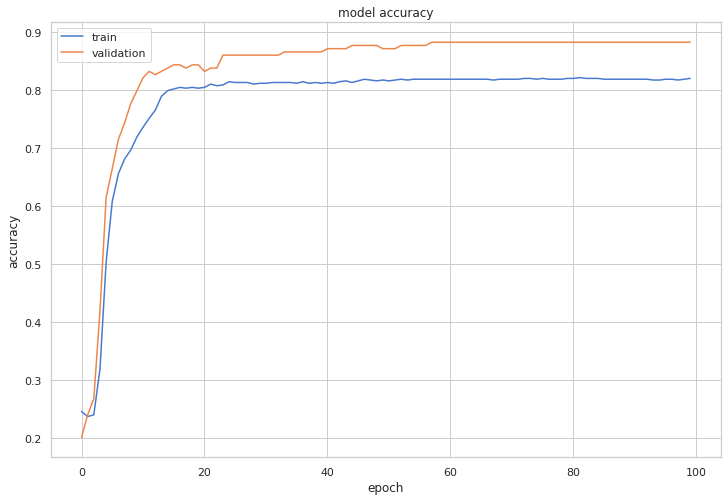

In [335]:
# Grafico correttezza valutazione su validation set e train set
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [336]:
"""
# Creazione oggetto per gestione rete neurale
model = KerasClassifier(build_fn=create_model, verbose=0)

#Parametri da considerare per miglioramento rete neurale
batch_size = [16, 32, 64, 128, 256, 1024]
epochs = [50, 100, 200 ,500, 1000]
param_grid = dict(batch_size=batch_size, epochs=epochs)

# Valutazione parametri
grid = GridSearchCV(estimator=model, 
                    param_grid=param_grid,
                    cv=10,
                    verbose=0)

#Applicazione parametri per creazione rete neurale
grid_result = grid.fit(X_train, y_train)

"""

'\n# Creazione oggetto per gestione rete neurale\nmodel = KerasClassifier(build_fn=create_model, verbose=0)\n\n#Parametri da considerare per miglioramento rete neurale\nbatch_size = [16, 32, 64, 128, 256, 1024]\nepochs = [50, 100, 200 ,500, 1000]\nparam_grid = dict(batch_size=batch_size, epochs=epochs)\n\n# Valutazione parametri\ngrid = GridSearchCV(estimator=model, \n                    param_grid=param_grid,\n                    cv=10,\n                    verbose=0)\n\n#Applicazione parametri per creazione rete neurale\ngrid_result = grid.fit(X_train, y_train)\n\n'

In [337]:
"""
# Riassunto risultati
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
"""

'\n# Riassunto risultati\nprint("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))\nmeans = grid_result.cv_results_[\'mean_test_score\']\nstds = grid_result.cv_results_[\'std_test_score\']\nparams = grid_result.cv_results_[\'params\']\nfor mean, stdev, param in zip(means, stds, params):\n    print("%f (%f) with: %r" % (mean, stdev, param))\n'

In [338]:
"""
# Creazione modello

model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=64, verbose=0)

# definizione parametri di algoritmo di ottimizzazzione ricerca
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Nadam']
param_grid = dict(opt=optimizer)

# search the grid
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, verbose=0)
grid_result = grid.fit(X_train, y_train)

"""

"\n# Creazione modello\n\nmodel = KerasClassifier(build_fn=create_model, epochs=100, batch_size=64, verbose=0)\n\n# definizione parametri di algoritmo di ottimizzazzione ricerca\noptimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Nadam']\nparam_grid = dict(opt=optimizer)\n\n# search the grid\ngrid = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, verbose=0)\ngrid_result = grid.fit(X_train, y_train)\n\n"

In [339]:
"""
# Riassunto risultati
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    
"""

'\n# Riassunto risultati\nprint("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))\nmeans = grid_result.cv_results_[\'mean_test_score\']\nstds = grid_result.cv_results_[\'std_test_score\']\nparams = grid_result.cv_results_[\'params\']\nfor mean, stdev, param in zip(means, stds, params):\n    print("%f (%f) with: %r" % (mean, stdev, param))\n    \n'

In [340]:
"""
seed(42)
tf.random.set_seed(42)

# Creazione nuovo modello con parametri migliori
model = KerasClassifier(build_fn=create_model, 
                        epochs=100, batch_size=64, verbose=0)

# Parametri di layering
layers = [[8],[10],[10,5],[12,6],[12,8,4]]
param_grid = dict(lyrs=layers)

# valutazione parametri
grid = GridSearchCV(estimator=model, param_grid=param_grid,cv= 10, verbose=0)
grid_result = grid.fit(X_train, y_train)

"""

'\nseed(42)\ntf.random.set_seed(42)\n\n# Creazione nuovo modello con parametri migliori\nmodel = KerasClassifier(build_fn=create_model, \n                        epochs=100, batch_size=64, verbose=0)\n\n# Parametri di layering\nlayers = [[8],[10],[10,5],[12,6],[12,8,4]]\nparam_grid = dict(lyrs=layers)\n\n# valutazione parametri\ngrid = GridSearchCV(estimator=model, param_grid=param_grid,cv= 10, verbose=0)\ngrid_result = grid.fit(X_train, y_train)\n\n'

In [341]:
"""
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    
"""

'\n# summarize results\nprint("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))\nmeans = grid_result.cv_results_[\'mean_test_score\']\nstds = grid_result.cv_results_[\'std_test_score\']\nparams = grid_result.cv_results_[\'params\']\nfor mean, stdev, param in zip(means, stds, params):\n    print("%f (%f) with: %r" % (mean, stdev, param))\n    \n'

In [342]:
"""
# ricreazione modello
model = KerasClassifier(build_fn=create_model, 
                        epochs=100, batch_size=64, verbose=0)

# parametri valore di dropout
drops = [0.0, 0.01, 0.05, 0.1, 0.2, 0.5]
param_grid = dict(dr=drops)
grid = GridSearchCV(estimator=model, param_grid=param_grid, verbose=0)
grid_result = grid.fit(X_train, y_train)

"""

'\n# ricreazione modello\nmodel = KerasClassifier(build_fn=create_model, \n                        epochs=100, batch_size=64, verbose=0)\n\n# parametri valore di dropout\ndrops = [0.0, 0.01, 0.05, 0.1, 0.2, 0.5]\nparam_grid = dict(dr=drops)\ngrid = GridSearchCV(estimator=model, param_grid=param_grid, verbose=0)\ngrid_result = grid.fit(X_train, y_train)\n\n'

In [343]:
"""
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    
"""

'\n# summarize results\nprint("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))\nmeans = grid_result.cv_results_[\'mean_test_score\']\nstds = grid_result.cv_results_[\'std_test_score\']\nparams = grid_result.cv_results_[\'params\']\nfor mean, stdev, param in zip(means, stds, params):\n    print("%f (%f) with: %r" % (mean, stdev, param))\n    \n'

In [344]:
# creazione modello finale con parametri testati e corretti
model = create_model(lyrs=[8], dr=0.0)

print(model.summary())

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 8)                 136       
_________________________________________________________________
dropout_7 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 9         
Total params: 145
Trainable params: 145
Non-trainable params: 0
_________________________________________________________________
None


In [345]:
# allenamento rete neurale su db train con test di validazione da 20%
training = model.fit(X_train, y_train, epochs=100, batch_size=64, 
                     validation_split=0.2, verbose=0)

# evaluate the model
scores = model.evaluate(X_train, y_train)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

28/28 [==============================] - 0s 1ms/step - loss: 0.4083 - accuracy: 0.8328

accuracy: 83.28%


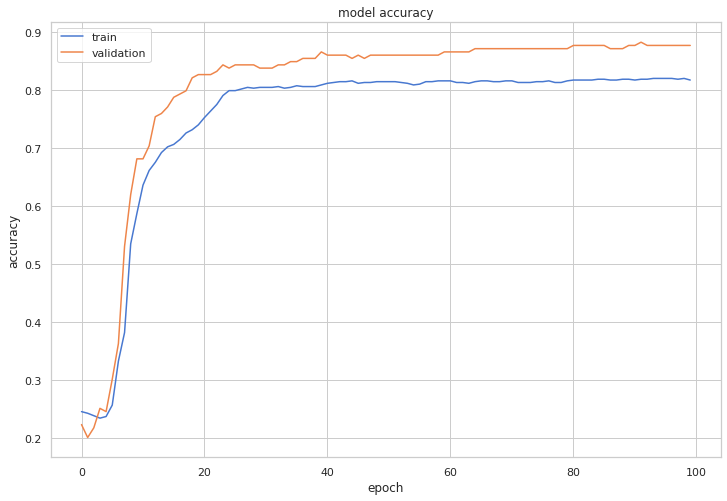

In [346]:
# Riassunto accuratezza modello
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [347]:
# Predizione usando il modello creato e salvataggio su soluzione finale
test['Survived'] = model.predict(X_test)
test['Survived'] = test['Survived'].apply(lambda x: round(x,0)).astype('int')
solution = test[['PassengerId', 'Survived']]
solution.to_csv("Neural_Network_Solution.csv", index=False)



In [348]:
#Modello logisticRegression DA ALLENARE
logreg = LogisticRegression()
# Fit our model to the training data
logreg.fit(X_train, y_train)
# Predict on the test data
logreg_data = pd.read_csv('/kaggle/working/test_clean.csv')
test['Survived'] = logreg.predict(X_test)
test['Survived'] = test['Survived'].apply(lambda x: round(x,0)).astype('int')
solutionlogreg =  test[['PassengerId', 'Survived']]
solutionlogreg.to_csv("LogisticReg_Solution.csv", index=False)

In [349]:
#Random forest con tutti i parametri, da poter provare

rffull = RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
rffull.fit(X_train, y_train)

cross_val_score(rffull, X_train, y_train, cv=10).mean()



0.8316479400749064

In [350]:
test['Survived'] = rffull.predict(X_test)


#Salvataggio su variabile soluzione e normalizzazione come da regolamento kaggle
solution = test[['PassengerId', 'Survived']]
solution['Survived'] = solution['Survived'].apply(int)

#Salvataggio in csv soluzione trovata
solution.to_csv("Random_ForestFullParameter_Solution.csv", index=False)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
